In [39]:
# Importing the necessary libraries
import pandas as pd            # pandas is used for data manipulation and analysis
import numpy as np             # numpy provides support for arrays and mathematical functions
import seaborn as sns          # seaborn is used for data visualization
import matplotlib.pyplot as plt  # matplotlib is used for creating visualizations
from mpl_toolkits.mplot3d import Axes3D  # Used to create 3D plots
from sklearn.feature_extraction.text import CountVectorizer  # Used for text feature extraction
from sklearn.metrics.pairwise import cosine_similarity      # Used to calculate cosine similarity between vectors

In [40]:
# Loading the Cleaned E-Commerce Data of 23k Customers
data = pd.read_csv('cleaned_data.csv')

In [41]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Subjectivity,Sentiment Label
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.07,0.36,Positive
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.55,0.62,Positive
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.51,0.57,Positive
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.18,0.53,Positive
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.13,0.61,Positive


In [42]:
data.shape

(19662, 13)

In [43]:
# Calling the Variables from E-Commerce Data of 23k Customers
data = data[['Clothing ID', 'Age', 'Recommended IND', 'Review Text', 'Rating']]
data.dropna(subset=['Review Text'], inplace=True)
data.reset_index(drop=True, inplace=True)
data['Review Text'] = data['Review Text'].str.lower()

In [44]:


# Calling the Clothing Items by using 'Clothing ID'here
Clothing_id = data['Clothing ID'].unique()

# Designing the Customer and Clothing Matrix by focusing on preferences of 'Clothing ID', 'Age' and 'Rating' through pivot table
Clothing_Customer_matrix = data.pivot_table(index='Clothing ID', columns='Age', values='Rating', fill_value=0)

# Shifting the data from pivot table to Numpy array to move towards cosine similarlity  
Clothing_Customer_matrix = Clothing_Customer_matrix.to_numpy()

# Cosine Similarlity for Collborative filtering by taking Customer and Clothing matrix 
Clothing_similarity = cosine_similarity(Clothing_Customer_matrix)

# Designing DataFrame by using Similiarity matrix data here
Clothing_similarity_df = pd.DataFrame(
    Clothing_similarity,
    index=Clothing_id,
    columns=Clothing_id
)

# Display of the Recommended Clothing ID of Collborative Filtering 
print(Clothing_similarity_df)
pd.options.display.float_format = '{:.2f}'.format

print("Cosine Similarity Matrix for Recommended Clothing IDs (Collaborative Filtering):")
print(Clothing_similarity_df)



      1077  1049  847   1080  858   1095  767   1065  853   1120  ...  227   \
1077  1.00  0.00  0.00  0.00  0.00  0.15  0.00  0.00  0.00  0.00  ...  0.00   
1049  0.00  1.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00  ...  0.00   
847   0.00  1.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00  ...  0.00   
1080  0.00  0.00  0.00  1.00  1.00  0.00  0.00  0.00  0.00  0.00  ...  0.45   
858   0.00  0.00  0.00  1.00  1.00  0.00  0.00  0.00  0.00  0.00  ...  0.45   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
630   0.27  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
181   0.00  0.30  0.30  0.00  0.00  0.00  0.00  0.00  0.00  0.30  ...  0.00   
721   0.00  0.00  0.00  0.00  0.00  0.00  0.42  0.00  0.00  0.00  ...  0.34   
262   0.00  0.00  0.00  1.00  1.00  0.00  0.00  0.00  0.00  0.00  ...  0.45   
522   0.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  ...  0.00   

      487   387   640   345   630   181   721   262

Top Recommendations for Clothing ID 1104
       Clothing ID  Age  Rating
9821          1078   28       5
17250         1066   57       5
9437           829   52       5
9439          1094   37       5
17249         1086   39       5


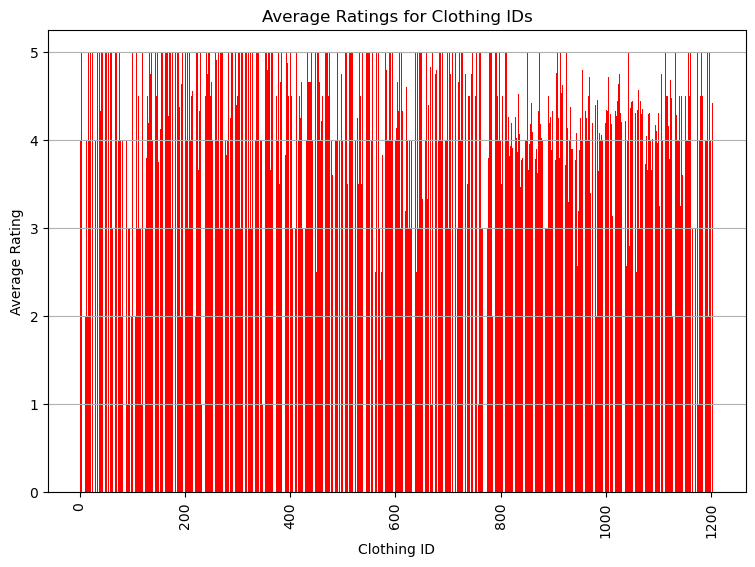

In [52]:
Clothing_id = data['Clothing ID'].unique()

# Locating the recommendation by using the 'Review Text' preferences from data
vectorizer = CountVectorizer(stop_words='english')
review_matrix = vectorizer.fit_transform(data['Review Text'])
review_similarity = cosine_similarity(review_matrix)
review_similarity_df = pd.DataFrame(review_similarity, index=data.index, columns=data.index)

# Calculating the Combined Similarity
alpha = 0.7
combined_similarity = alpha * Clothing_similarity_df + (1 - alpha) * review_similarity_df

# Updating the recommendations DataFrame based on the combined similarity for the specific 'clothing_id'
clothing_id = 1104
recommendations = pd.DataFrame(data)
selected_recommendations = recommendations[recommendations['Clothing ID'] == clothing_id]

# Drop duplicate recommendations based on 'Clothing ID'
selected_recommendations = selected_recommendations.drop_duplicates(subset='Clothing ID', keep='first')

# Excluding the input 'clothing_id' from the recommendations
recommendations = recommendations[recommendations['Clothing ID'] != clothing_id]

# Sorting the recommendations based on 'Rating' in descending order
sorted_recommendations = recommendations.sort_values(by='Rating', ascending=False)

# Displaying top 5 recommendations for the specific 'Clothing ID'
print("Top Recommendations for Clothing ID", clothing_id)
print(sorted_recommendations[['Clothing ID', 'Age', 'Rating']].head(5))

# Grouping of the DataFrame by preference of 'Clothing ID' and exploring the average rating for each selected Clothing_id
average_ratings = recommendations.groupby('Clothing ID')['Rating'].mean().reset_index()

# Designing Bar Plot to visualize the recommended Clothing ID
plt.figure(figsize=(9, 6))
plt.bar(average_ratings['Clothing ID'], average_ratings['Rating'], color='red')
plt.xlabel('Clothing ID')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Clothing IDs')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


In [47]:
recommendations = pd.DataFrame(data)
# Using 'recommendations' DataFrame and duplicating Clothing IDs 
recommendations = recommendations.drop_duplicates(subset='Clothing ID', keep='first')

Top Recommendations for Clothing ID 22
   Clothing ID  Age  Rating
0         1077   60       3
1         1049   50       5
2          847   47       5
3         1080   49       2
4          858   39       5


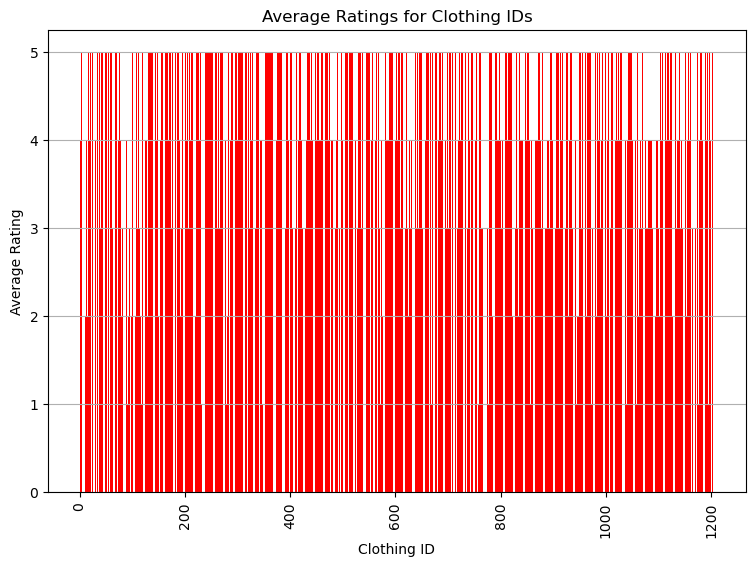

In [49]:
# Displaying recommendations for specific 'Clothing ID'
clothing_id = 22
print("Top Recommendations for Clothing ID", clothing_id)
print(recommendations[['Clothing ID', 'Age', 'Rating']].head(5))

# Grouping of the DataFrame by preference of 'Clothing ID' and exploring the average rating for each selected Clothing_id
average_ratings = recommendations.groupby('Clothing ID')['Rating'].mean().reset_index()

# Designing Bar Plot to visualise the recommended Clothing ID
plt.figure(figsize=(9, 6)) 
plt.bar(average_ratings['Clothing ID'], average_ratings['Rating'], color='red')
plt.xlabel('Clothing ID')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Clothing IDs')
plt.xticks(rotation=90) 
plt.grid(axis='y')  
plt.show()

Top Recommendations for Clothing ID 1104
       Clothing ID  Age  Rating
9821          1078   28       5
17250         1066   57       5
9437           829   52       5
9439          1094   37       5
17249         1086   39       5


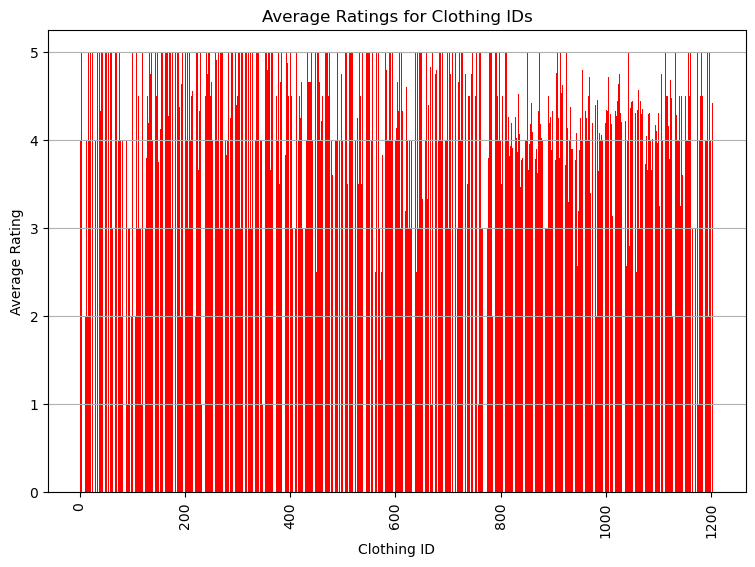